In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Deep_learning'

/content/drive/MyDrive/Deep_learning


In [3]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
from torch import nn
from torchinfo import summary
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

In [6]:
from pytorchcv import train, plot_results, display_dataset, train_long, check_image_dir

In [7]:
class LeNet(nn.Module):
    def __init__(self, lr = 0.1, num_classes = 10):
        super().__init__()
        self.lr = lr
        self.num_classes = num_classes
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size = 5, padding = 2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size = 2, stride = 2),
            nn.LazyConv2d(16, kernel_size = 5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size = 2, stride = 2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes)
        )
    def forward(self, x):
        return self.net(x)
    
net = LeNet()
summary(net, input_size = (1,1,28,28))

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Conv2d: 2-1                       [1, 6, 28, 28]            156
│    └─Sigmoid: 2-2                      [1, 6, 28, 28]            --
│    └─AvgPool2d: 2-3                    [1, 6, 14, 14]            --
│    └─Conv2d: 2-4                       [1, 16, 10, 10]           2,416
│    └─Sigmoid: 2-5                      [1, 16, 10, 10]           --
│    └─AvgPool2d: 2-6                    [1, 16, 5, 5]             --
│    └─Flatten: 2-7                      [1, 400]                  --
│    └─Linear: 2-8                       [1, 120]                  48,120
│    └─Sigmoid: 2-9                      [1, 120]                  --
│    └─Linear: 2-10                      [1, 84]                   10,164
│    └─Sigmoid: 2-11                     [1, 84]                   --
│  

In [8]:
import torchvision
from torchvision.transforms import ToTensor

data_train = torchvision.datasets.MNIST(
    './data',
    download = False,
    train = True,
    transform = ToTensor()
)

data_test = torchvision.datasets.MNIST(
    './data',
    download = False,
    train = False,
    transform = ToTensor()
)

In [9]:
train_loader = torch.utils.data.DataLoader(data_train, batch_size = 64, shuffle = True, pin_memory = True)
test_loader = torch.utils.data.DataLoader(data_test, batch_size = 64, pin_memory = True)

In [10]:
def get_default_device():
  """Picking GPU if available or else CPU"""
  if torch.cuda.is_available():
      return torch.device('cuda')
  else:
      return torch.device('cpu')

In [11]:
def to_device(data, device):
  """Move tensor(s) tp chosen device"""
  if isinstance(data, (list, tuple)):
      return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

In [12]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [13]:
device = get_default_device()
print(device)
train_loader = DeviceDataLoader(train_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

cuda


In [14]:
to_device(net, device)

LeNet(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=120, bias=True)
    (8): Sigmoid()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Sigmoid()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [15]:
opt = torch.optim.SGD(net.parameters(), lr = net.lr, momentum = 0.9)
hist = train(net, train_loader, test_loader, epochs = 10, optimizer = opt, loss_fn = nn.CrossEntropyLoss())

Epoch  0, Train acc=0.105, Val acc=0.114, Train loss=0.036, Val loss=0.036
Epoch  1, Train acc=0.107, Val acc=0.101, Train loss=0.036, Val loss=0.036
Epoch  2, Train acc=0.106, Val acc=0.103, Train loss=0.036, Val loss=0.036
Epoch  3, Train acc=0.106, Val acc=0.103, Train loss=0.036, Val loss=0.036
Epoch  4, Train acc=0.106, Val acc=0.101, Train loss=0.036, Val loss=0.036
Epoch  5, Train acc=0.104, Val acc=0.103, Train loss=0.036, Val loss=0.036
Epoch  6, Train acc=0.108, Val acc=0.103, Train loss=0.036, Val loss=0.036
Epoch  7, Train acc=0.108, Val acc=0.101, Train loss=0.036, Val loss=0.036
Epoch  8, Train acc=0.107, Val acc=0.103, Train loss=0.036, Val loss=0.036
Epoch  9, Train acc=0.112, Val acc=0.201, Train loss=0.036, Val loss=0.036


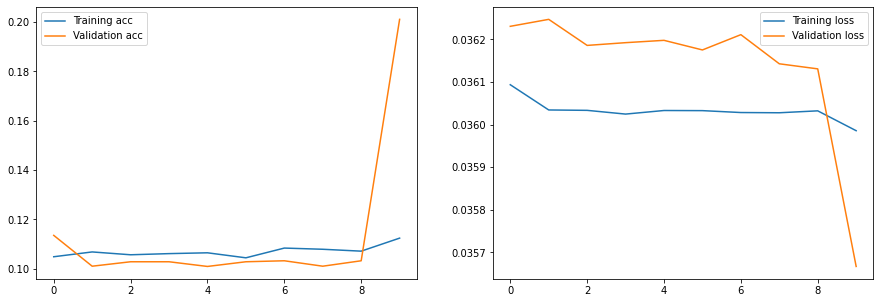

In [16]:
plot_results(hist)